In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import nibabel as nb
import seaborn as sns

### Plot eigenvalue distribution

In [3]:
eigen_vol = pickle.load(open( '/home/julia/data/gradients/results/embedding_vol/embed_dict.pkl', 'rb'))

In [9]:
eigen_perc_vol = eigen_vol['lambdas']/np.sum(eigen_vol['lambdas'])

In [21]:
comp09 = np.where(np.cumsum(eigen_perc_vol) > 0.9)[0][0]
comp05 = np.where(np.cumsum(eigen_perc_vol) > 0.5)[0][0]

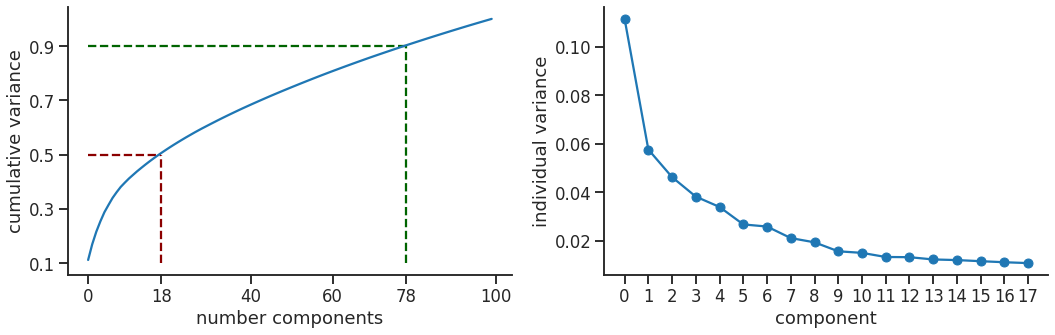

In [24]:
sns.set_context('talk')
sns.set_style('ticks')
fig = plt.figure(figsize=(15,5))

fig.add_subplot(121)
plt.plot(np.cumsum(eigen_perc_vol))
plt.ylabel('cumulative variance')
plt.xlabel('number components')
plt.xticks([0, comp05, 40, 60, comp09, 100])
plt.yticks([0.1, 0.3, 0.5, 0.7, 0.9])
plt.hlines(0.9, 0, comp09, color='darkgreen', linestyle="--")
plt.vlines(comp09, 0.1, 0.9, color='darkgreen', linestyle="--")
plt.hlines(0.5, 0, comp05, color='darkred', linestyle="--")
plt.vlines(comp05, 0.1, 0.5, color='darkred', linestyle="--")


sns.despine()

fig.add_subplot(122)
plt.plot(eigen_perc_vol[:comp05], 'o', linestyle="-")
plt.xticks(range(comp05))
plt.ylabel('individual variance')
plt.xlabel('component')

sns.despine()
plt.tight_layout()

In [8]:
#fig.savefig('/home/julia/Documents/projects/mouse_gradients/embedding_components.png')

### Plot first 6 components in Allen space

In [26]:
template = nb.load('/home/julia/data/gradients/atlas/allen_api/template_200.nii.gz').get_data()
mask = nb.load('/home/julia/data/gradients/atlas/allen_api/cortex_mask_tight_200um.nii.gz').get_data()

In [31]:
x=30
y=12
z=20

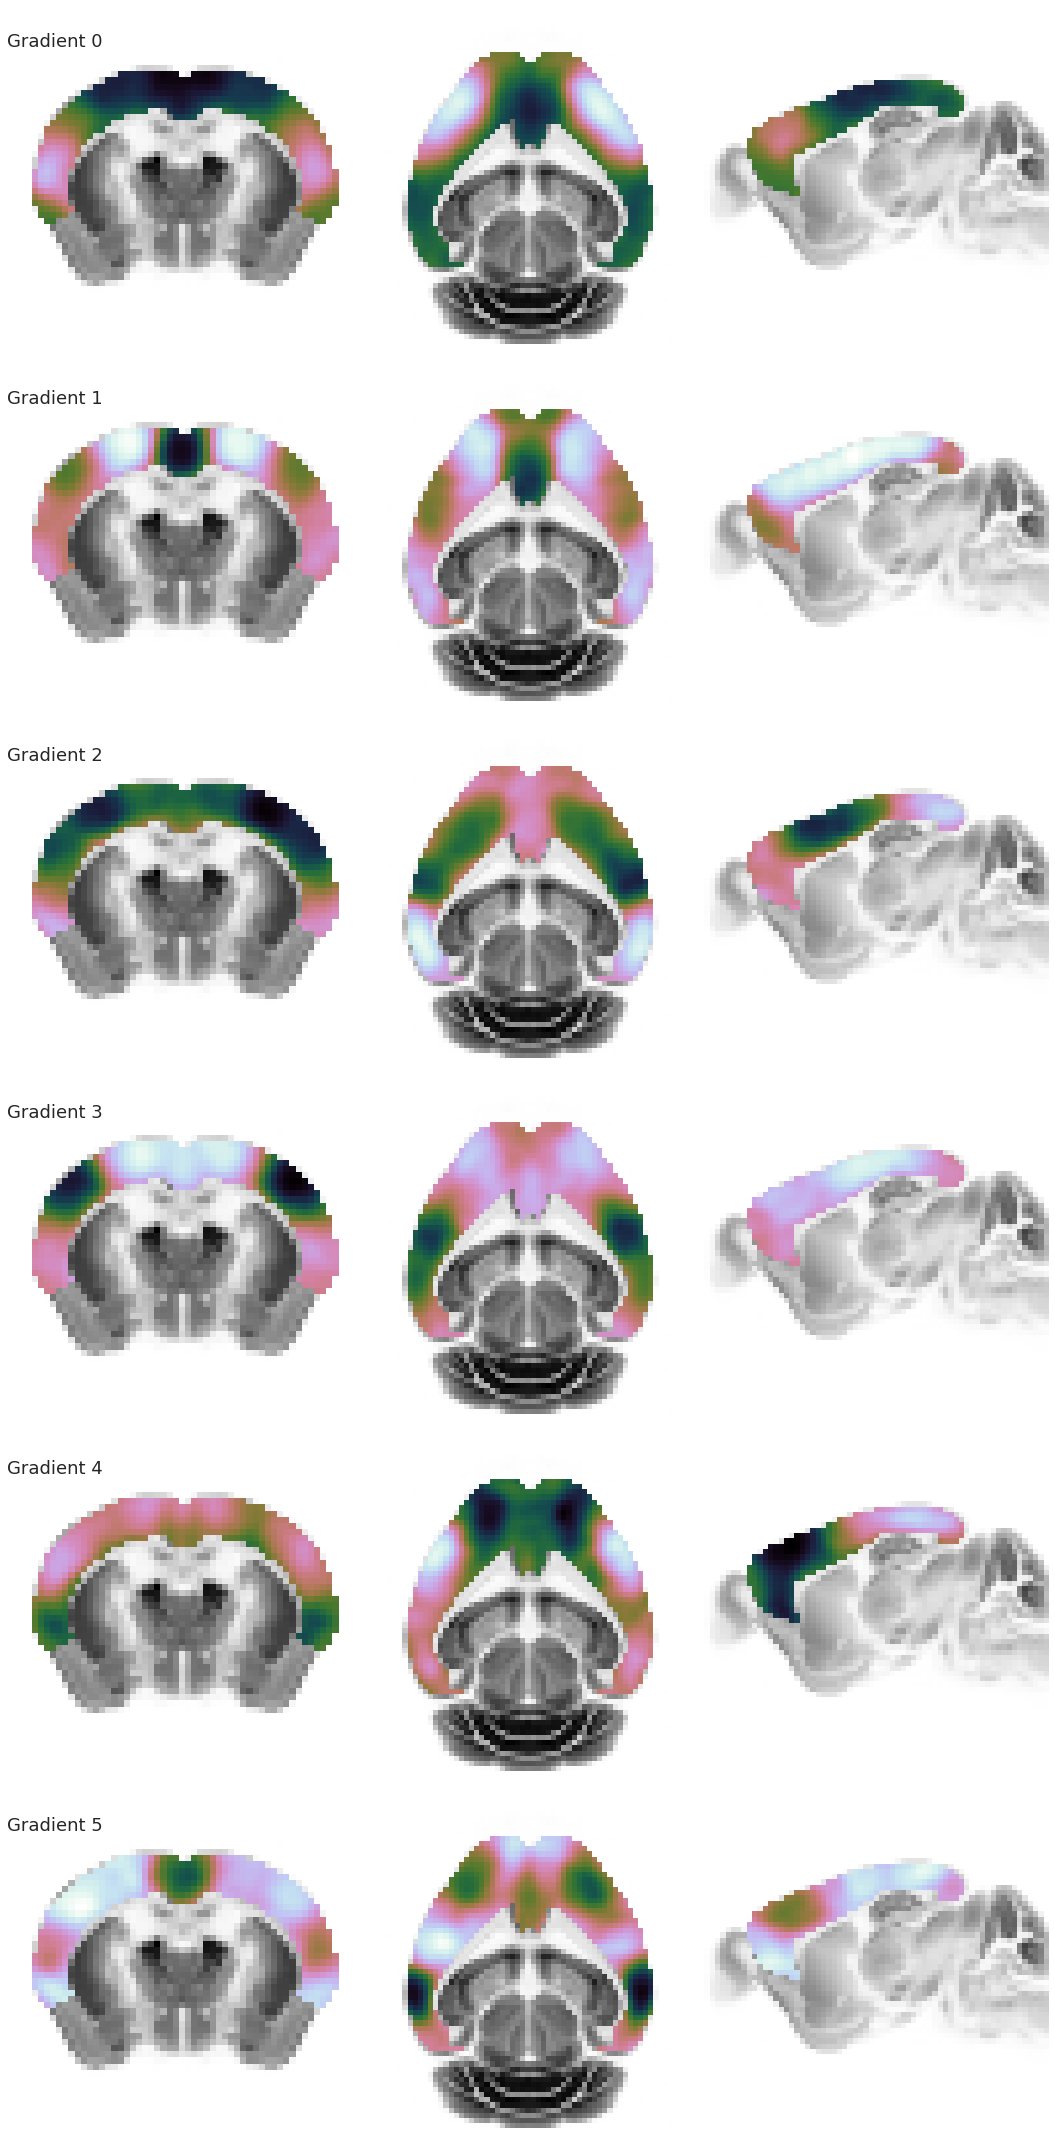

In [34]:
gradients = nb.load('/home/julia/data/gradients/results/embedding_vol/embed.nii.gz').get_data()
fig = plt.figure(figsize=(15,30))
for g in range(6):
    
    gradient = gradients[:,:,:,g]
    gradient[mask==0] = np.nan
    vmin, vmax = np.nanmin(gradient), np.nanmax(gradient)
    
    template_img = [template[x,:,:], template[:,y,:], template[:,:,z].T]
    gradient_img = [gradient[x,:,:], gradient[:,y,:], gradient[:,:,z].T]
    
    for i in range(3):
        
        fig.add_subplot(6,3,(g*3+(i+1)))
        plt.imshow(template_img[i],  cmap='Greys', aspect='equal');
        plt.imshow(gradient_img[i],  cmap="cubehelix_r", aspect='equal', vmin=vmin, vmax=vmax);
        if i == 0:
            plt.title('Gradient %s' %g, loc='left')
        plt.axis('off');

plt.tight_layout()

In [13]:
fig.savefig('/home/julia/Documents/projects/mouse_gradients/gradient_0to5.png')